In [8]:
import datetime
import json

import matplotlib.pyplot as plt
from keras.preprocessing import image
from helper import data_to_tensor
import matplotlib.pyplot as plt
import pandas as pd


import pandas_datareader as pdr
import numpy as np

In [9]:

stocks = pd.read_excel('positions_bbc.xls', index_col=0, skiprows=1).Ticker.values

In [10]:
dataframe_dict= {}
for stock in stocks: 

    df = pdr.get_data_yahoo(stock, start='2000-01-01')
    # Change inde to a date  string
    df['Date'] = df.index.strftime("%Y-%m-%d %H:%M:%S")
    
    dataframe_dict[stock] = df.to_dict('records')

data = dataframe_dict

In [11]:
stocks = [ stock for stock in data.keys()]

IMMU 01/29/2020, 19:46:27
IMMU 01/29/2020, 20:01:01 0:14:33.224498
ZIOP 01/29/2020, 20:01:01
ZIOP 01/29/2020, 20:20:06 0:33:38.879350
CRSP 01/29/2020, 20:20:06
CRSP 01/29/2020, 20:25:29 0:39:02.041670
IOVA 01/29/2020, 20:25:29


C:\Users\FlatIron_User\.conda\envs\learn-env12_12_19\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


IOVA 01/29/2020, 20:45:17 0:58:50.037825
VKTX 01/29/2020, 20:45:17
VKTX 01/29/2020, 20:57:15 1:10:47.625258
EIDX 01/29/2020, 20:57:15
EIDX 01/29/2020, 21:01:11 1:14:43.252691
MYOV 01/29/2020, 21:01:11
MYOV 01/29/2020, 21:10:12 1:23:44.879319
AMRS 01/29/2020, 21:10:12
AMRS 01/29/2020, 21:41:21 1:54:53.272284
KRYS 01/29/2020, 21:41:21
KRYS 01/29/2020, 21:49:27 2:03:00.118894
KURA 01/29/2020, 21:49:27
KURA 01/29/2020, 22:05:43 2:19:16.019316
MDGL 01/29/2020, 22:05:43
MDGL 01/29/2020, 23:05:37 3:19:09.642896
UBX 01/29/2020, 23:05:37
UBX 01/30/2020, 00:13:00 4:26:33.079523
TCDA 01/30/2020, 00:13:00
TCDA 01/30/2020, 00:21:11 4:34:43.827931
QURE 01/30/2020, 00:21:11
QURE 01/30/2020, 00:57:40 5:11:13.199245
MRTX 01/30/2020, 00:57:40
MRTX 01/30/2020, 01:40:37 5:54:09.635205
ASMB 01/30/2020, 01:40:37
ASMB 01/30/2020, 02:46:06 6:59:38.774385
GLYC 01/30/2020, 02:46:06
GLYC 01/30/2020, 03:32:14 7:45:47.135646
RYTM 01/30/2020, 03:32:14
RYTM 01/30/2020, 03:49:23 8:02:55.226281
FIXX 01/30/2020, 03:49:

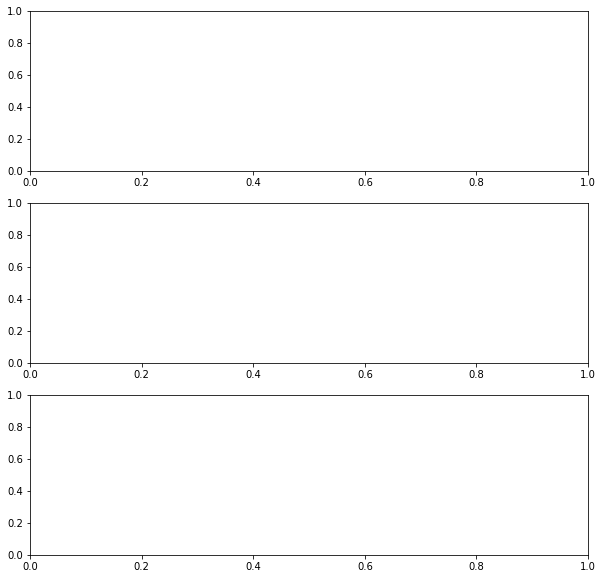

In [12]:
start = datetime.datetime.now()
period = 60
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))
for stock in stocks[72:]: 
    print(stock, datetime.datetime.now().strftime("%m/%d/%Y, %H:%M:%S"))
    stock_dict_list = data[stock]
    for index, dict_ in enumerate(stock_dict_list):
        if index-period >= 0 :
            high = [dict_['High'] for dict_ in stock_dict_list[index-period:index]]
            low = [dict_['Low'] for dict_ in stock_dict_list[index-period:index]]
            volume = [dict_['Volume'] for dict_ in stock_dict_list[index-period:index]]
            volume = volume/ np.max(volume)  
            open_ = [dict_['Open'] for dict_ in stock_dict_list[index-period:index]]
            ad_close = [dict_['Adj Close'] for dict_ in stock_dict_list[index-period:index]]
            close = [dict_['Close'] for dict_ in stock_dict_list[index-period:index]]
            
            #High, low, and close price on plot

            ax1.plot(list(range(0,len(high))), high, color='g')
            ax1.plot(list(range(0,len(low))), low, color='r')
            ax1.plot(list(range(0,len(close))), close, color='b')
            ax1.axis('off')

            ax2.plot(list(range(0,len(high))), high, color='g')
            ax2.plot(list(range(0,len(low))), low, color='r')
            ax2.plot(list(range(0,len(open_))), open_, color='b')
            ax2.axis('off')

            ax3.plot(list(range(0,len(volume))), volume, color='g')
            ax3.axis('off')
            filepath = f'C:/Users/FlatIron_User/capstone_stock/{stock}_{index}.png'
            fig.savefig(filepath)
            ax1.cla()
            ax2.cla()
            ax3.cla()


        else:
            filepath = None
        stock_dict_list[index]['Tensor'] = filepath 
        
    data[stock] = stock_dict_list
    print(stock, datetime.datetime.now().strftime("%m/%d/%Y, %H:%M:%S"), (datetime.datetime.now()- start))
  

In [4]:
start = datetime.datetime.now()
period = 60

for stock in stocks[:10]: 
    
    stock_dict_list = data[stock]
    for index, dict_ in enumerate(stock_dict_list):
        if index-period >= 0 :          
            filepath = f'C:/Users/FlatIron_User/capstone_stock/{stock}_{index}.png'
            try:
                img = image.load_img(filepath, target_size=(224, 224))
                img_tensor = image.img_to_array(img)
                img_tensor = np.expand_dims(img_tensor, axis=0)
        #Follow the Original Model Preprocessing
                img_tensor /= 255.
            except:
                img_tensor = None
            stock_dict_list[index]['Tensor'] = img_tensor
                
        else:
            img_tensor = None          
    data[stock] = stock_dict_list
    print(stock, datetime.datetime.now().strftime("%m/%d/%Y, %H:%M:%S"), (datetime.datetime.now()- start))
    

ITCI 01/29/2020, 13:54:03 0:00:21.740409
AXSM 01/29/2020, 13:54:23 0:00:41.817335
CVM 01/29/2020, 13:55:35 0:01:53.483628
KRTX 01/29/2020, 13:55:36 0:01:54.680090
APLS 01/29/2020, 13:55:41 0:01:59.641465
PRVB 01/29/2020, 13:55:45 0:02:04.096763
CRTX 01/29/2020, 13:55:47 0:02:05.788658
EPZM 01/29/2020, 13:56:07 0:02:26.109406
CRBP 01/29/2020, 13:56:22 0:02:40.539011
CCXI 01/29/2020, 13:56:51 0:03:09.828089


In [5]:
import pandas as pd

#### Creating Target

In [6]:
#Next Day Max/Min Value (% Difference from Closing Price)¶
start = datetime.datetime.now()
period = [1, 2]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_1'] = _low
        stock_dict_list[index]['Max_1'] = _max
    data[stock] = stock_dict_list

# 3 Day Max/Min Value (% Difference from Closing Price)
# The range is from the 2nd day to the 3rd after the input day
start = datetime.datetime.now()
period = [2, 4]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_3'] = _low
        stock_dict_list[index]['Max_3'] = _max
    data[stock] = stock_dict_list

# 10 Day Max/Min Value (% Difference from Closing Price)
# The range is from the 4th day to the 10th after the input day

start = datetime.datetime.now()
period = [4, 11]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_10'] = _low
        stock_dict_list[index]['Max_10'] = _max
    data[stock] = stock_dict_list

# 30 Day Max/Min Value (% Difference from Closing Price)
# The range is from the 11th day to the 30th after the input day
start = datetime.datetime.now()
period = [11, 31]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_30'] = _low
        stock_dict_list[index]['Max_30'] = _max
    data[stock] = stock_dict_list

#### Converted  to DataFrame

In [7]:
data_in_list = []
for stock in stocks:
    stock_dict_list = data[stock]
    for index, dict_ in enumerate(stock_dict_list):
        dict_['Ticker'] = stock
        data_in_list.append(dict_)
df = pd.DataFrame(data_in_list)   
print(len(df))
df.head()

148195


,Adj Close,Close,Date,High,Low,Low_1,Low_10,Low_3,Low_30,Max_1,Max_10,Max_3,Max_30,Open,Tensor,Ticker,Volume
0,15.000000,15.000000,2014-01-07 00:00:00,17.00,15.000000,0.000000,0.125000,0.068750,-0.012500,0.125000,0.250000,0.250000,0.250000,16.0,NaN,ITCI,59800.0
1,17.000000,17.000000,2014-01-08 00:00:00,18.00,16.000000,-0.022857,0.028571,0.000000,-0.097143,0.014286,0.142857,0.142857,0.142857,17.5,NaN,ITCI,51100.0
2,17.500000,17.500000,2014-01-09 00:00:00,17.75,17.100000,0.000000,0.028571,0.028571,-0.097143,0.142857,0.142857,0.100000,0.142857,17.5,NaN,ITCI,159900.0
3,18.000000,18.000000,2014-01-10 00:00:00,20.00,17.500000,0.040000,0.040571,0.028571,-0.097143,0.057143,0.142857,0.100000,0.142857,17.5,NaN,ITCI,157100.0
4,18.200001,18.200001,2014-01-13 00:00:00,18.50,18.200001,-0.021739,-0.002717,-0.021739,-0.141304,0.046196,0.086957,0.032609,0.086957,18.4,NaN,ITCI,5000.0


In [8]:
#Checking null values
df.isna().sum()

Adj Close         0
Close             0
Date              0
High              0
Low               0
Low_1           192
Low_10         1056
Low_3           384
Low_30         2976
Max_1           192
Max_10         1056
Max_3           384
Max_30         2976
Open              0
Tensor       134917
Ticker            0
Volume            0
dtype: int64

In [9]:
df = df.dropna()

In [14]:
image_tensors = np.array(df.Tensor)
image_tensors = [i.flatten() for i in image_tensors]

In [15]:
np.shape(image_tensors)

(12988, 150528)

In [16]:
type(image_tensors)

list

In [17]:
with open('test.json', 'wb') as outfile:
    json.dump(image_tensors, outfile)

TypeError: a bytes-like object is required, not 'str'

In [ ]:
!jupyter nbconvert --to markdown index.ipynb
!mv index.md README.md

!git add . 
!git commit -m "Complete"
!git push

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--generate-config

    generate default config file

-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in 

[NbConvertApp] WARNING | pattern 'index.ipynb' matched no files
mv: cannot stat 'index.md': No such file or directory
